## Data Preprocessing and Feature Engineering
This is an important step in machine learning. Here we will perfrom data scaling, either normalisation or standardisation, which will assist the ML model in making accurate predictions. 

In [52]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor

In [31]:
#import cleaned df csv

df = pd.read_csv("Regression project cleaned dataset", index_col=None)

#drop unamed column - exported incorrectly - index should be set to False
##df = df.drop(columns='Unnamed: 0')
#output top 5 rows
df.head()

,Country,Year,Savanna_fires,Forest_fires,Crop_Residues,Rice_Cultivation,Drained_organic_soils_(CO2),Pesticides_Manufacturing,Food_Transport,Forestland,...,Fires_in_humid_tropical_forests,On-farm_energy_use,Rural_population,Urban_population,Total_Population_-_Male,Total_Population_-_Female,total_emission,Average_Temperature_°C,Total_Population,Total_OnFarm_Energy
0,Afghanistan,1993,14.7237,0.0557,230.8175,686.0,0.0,11.712073,54.3617,-2388.803,...,0.0,140.6888,11858090,3237009,7003641,7000119,2368.470529,0.101917,14003760,149.7523
1,Afghanistan,1994,14.7237,0.0557,242.0494,705.6,0.0,11.712073,53.9874,-2388.803,...,0.0,140.6888,12690115,3482604,7733458,7722096,2500.768729,0.372250,15455554,149.0850
2,Afghanistan,1995,14.7237,0.0557,243.8152,666.4,0.0,11.712073,54.6445,-2388.803,...,0.0,140.6888,13401971,3697570,8219467,8199445,2624.612529,0.285583,16418912,148.4609
3,Afghanistan,1996,38.9302,0.2014,249.0364,686.0,0.0,11.712073,53.1637,-2388.803,...,0.0,140.6888,13952791,3870093,8569175,8537421,2838.921329,0.036583,17106596,147.9109
4,Afghanistan,1997,30.9378,0.1193,276.2940,705.6,0.0,11.712073,52.0390,-2388.803,...,0.0,140.6888,14373573,4008032,8916862,8871958,3204.180115,0.415167,17788820,148.1289


#### Data Preprocessing
Scaling and standardising data to ensure all features are on a similar scale. This step is essential for training our models.

In [32]:
#first drop Country feature
df = df.drop('Country', axis = 1)

In [33]:
#create X and y features
X = df.drop(['Average_Temperature_°C', 'Year'], axis = 1)
y = df['Average_Temperature_°C']

In [34]:
#create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#### Handling Multicollinearity
To identify multicollinear features, we calculate the VIF for each feature and drop features with VIF above a threshold. This step removes features that are highly collinear with other features.

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature and remove those with high VIF
def calculate_vif(df, threshold=5.0):
    vif_data = pd.DataFrame()
    vif_data['Feature'] = df.columns
    vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data[vif_data['VIF'] > threshold]

# Apply VIF on the scaled features, dropping high VIF columns iteratively
X1 = df.drop(columns=['Average_Temperature_°C', 'Year']).copy()
while True:
    vif_data = calculate_vif(X1)
    if vif_data.shape[0] == 0:  # No high VIF features left
        break
    else:
        # Drop the feature with the highest VIF score
        high_vif_feature = vif_data.sort_values('VIF', ascending=False).iloc[0]['Feature']
        X1 = X1.drop(columns=[high_vif_feature])
        print(f"Dropped '{high_vif_feature}' due to high VIF.")

c:\Users\X464585\.conda\envs\regression_env\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Dropped 'Total_OnFarm_Energy' due to high VIF.


c:\Users\X464585\.conda\envs\regression_env\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Dropped 'Total_Population' due to high VIF.
Dropped 'Total_Population_-_Female' due to high VIF.
Dropped 'Total_Population_-_Male' due to high VIF.
Dropped 'Urban_population' due to high VIF.
Dropped 'Manure_applied_to_Soils' due to high VIF.
Dropped 'IPPU' due to high VIF.
Dropped 'Food_Packaging' due to high VIF.
Dropped 'Rural_population' due to high VIF.
Dropped 'Crop_Residues' due to high VIF.
Dropped 'Agrifood_Systems_Waste_Disposal' due to high VIF.
Dropped 'Food_Household_Consumption' due to high VIF.
Dropped 'Manure_Management' due to high VIF.
Dropped 'On-farm_energy_use' due to high VIF.
Dropped 'Food_Processing' due to high VIF.
Dropped 'total_emission' due to high VIF.
Dropped 'Forest_fires' due to high VIF.
Dropped 'Food_Transport' due to high VIF.
Dropped 'Rice_Cultivation' due to high VIF.


In [38]:
X1.head()

,Savanna_fires,Drained_organic_soils_(CO2),Pesticides_Manufacturing,Forestland,Food_Retail,On-farm_Electricity_Use,Fertilizers_Manufacturing,Manure_left_on_Pasture,Fires_in_organic_soils,Fires_in_humid_tropical_forests
0,14.7237,0.0,11.712073,-2388.803,81.4607,9.0635,14.0559,1642.9623,0.0,0.0
1,14.7237,0.0,11.712073,-2388.803,90.4008,8.3962,15.1269,1689.3593,0.0,0.0
2,14.7237,0.0,11.712073,-2388.803,98.8680,7.7721,15.9118,1779.3139,0.0,0.0
3,38.9302,0.0,11.712073,-2388.803,21.6458,7.2221,16.9535,1900.5873,0.0,0.0
4,30.9378,0.0,11.712073,-2388.803,28.2132,7.4401,18.1079,2110.6375,0.0,0.0


#### Notes
The VIF function removed features with high variance, leaving us with fewer features, as seen in our new X dataframe above. We can compare the model results - before and after. X and X1.

Starting off a with a linear model. Even though there's no linear relationships between predictor and responde variables, this model will act as a baseline model.

In [43]:
#initialise the model object
lm_x = LinearRegression()

#train the model
lm_x.fit(X_test, y_test)

#predict avg temp
y_pred_x = lm_x.predict(X_test)

#model performance on all features
mae_x = mean_absolute_error(y_test, y_pred_x)
r2_x = r2_score(y_test, y_pred_x)
rmse_x = np.sqrt(mae_x)

mae_all_features = mae_x
r2_all_features = r2_x
rmse_all_features = rmse_x

Train model on reduced set of features based on VIF function

In [44]:
#Create train, test set based on reduced features
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X1, y, test_size = 0.2, random_state = 42)


#initialise the model object
lm_x1 = LinearRegression()

#train the model
lm_x1.fit(X_train_1, y_train_1)

#predict avg temp
y_pred_x1 = lm_x1.predict(X_test_1)

#model performance on all features
mae_x1 = mean_absolute_error(y_test_1, y_pred_x1)
r2_x1 = r2_score(y_test_1, y_pred_x1)
rmse_x1 = np.sqrt(mae_x1)

mae_sub_features = mae_x1
r2_sub_features = r2_x1
rmse_sub_features = rmse_x1

In [51]:
# Your existing results dictionary
linear_model_results = {
    'mae_all_features': [mae_all_features],
    'r2_all_features': [r2_all_features],
    'rmse_all_features': [rmse_all_features],
    'mae_sub_features': [mae_sub_features],
    'r2_sub_features': [r2_sub_features],
    'rmse_sub_features': [rmse_sub_features],
}

# Create the initial DataFrame
linear_model_results = pd.DataFrame(linear_model_results)

# Reshape the DataFrame to have a "Metric" column and two result columns: "All Features" and "Sub Features"
linear_model_results_df = pd.DataFrame({
    'Metric': ['mae', 'r2', 'rmse'],
    'All Features': [linear_model_results['mae_all_features'][0], 
                     linear_model_results['r2_all_features'][0], 
                     linear_model_results['rmse_all_features'][0]],
    'Subset Features': [linear_model_results['mae_sub_features'][0], 
                     linear_model_results['r2_sub_features'][0], 
                     linear_model_results['rmse_sub_features'][0]]
})

# Display the reshaped DataFrame
linear_model_results_df


,Metric,All Features,Subset Features
0,mae,0.386150,0.389745
1,r2,0.041906,0.020362
2,rmse,0.621409,0.624296


#### Notes:
Minor differences are seen when training the linear model on all features and a subset of features. The model performs slightly better on all features. A reminder that this model is used as a baseline and model and we would expect results to be better than this going forward.

Next we'll look at models that should capture the non-linear patterns in our data more accurately. Ridge, Lasso and Random Forest models will be trained on our data. 

In [70]:
models = {
    'Ridge Regression': Ridge(alpha = 2),
    'Lasso regression': Lasso(alpha = 1),
    'Random Forest': RandomForestRegressor(n_estimators = 100, max_depth = 50, random_state = 42),   
}

#train and evaluate each model
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mse)
    results[model_name] = {'MAE': mae, 'MSE': mse,'R² Score': r2, 'RMSE': rmse}
    print(f"{model_name} - MAE: {mae:.4f}, 'MSE': {mse:.4f}, R² Score: {r2:.4f}, 'RMSE': {rmse:.4f}")

c:\Users\X464585\.conda\envs\regression_env\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.10628e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\X464585\.conda\envs\regression_env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.234e+02, tolerance: 1.497e-01
  model = cd_fast.enet_coordinate_descent(


Ridge Regression - MAE: 0.3872, 'MSE': 0.2609, R² Score: 0.0254, 'RMSE': 0.5107
Lasso regression - MAE: 0.3872, 'MSE': 0.2612, R² Score: 0.0240, 'RMSE': 0.5111
Random Forest - MAE: 0.2881, 'MSE': 0.1539, R² Score: 0.4250, 'RMSE': 0.3923


In [59]:
model_results = pd.DataFrame(results)
model_results

,Ridge Regression,Lasso regression,Random Forest
MAE,0.387220,0.387168,0.287664
MSE,0.260851,0.261221,0.153057
R² Score,0.025410,0.024025,0.428150
RMSE,0.510735,0.511098,0.391225


In [56]:
models_sub_features = {
    'Ridge Regression': Ridge(alpha = 1),
    'Lasso regression': Lasso(alpha = 0.1),
    'Random Forest': RandomForestRegressor(n_estimators = 200, random_state = 42),   
}

#train and evaluate each model
results_subset_features = {}
for model_name, model in models_sub_features.items():
    model.fit(X_train_1, y_train_1)
    y_pred_1 = model.predict(X_test_1)
    mae_sub = mean_absolute_error(y_test_1, y_pred_1)
    mse_sub = mean_squared_error(y_test_1, y_pred_1)
    r2_sub = r2_score(y_test_1, y_pred_1)
    rmse_sub = np.sqrt(mse_sub)
    results_subset_features[model_name] = {'MAE': mae_sub, 'MSE': mse_sub,'R² Score': r2_sub, 'RMSE': rmse_sub}
    print(f"{model_name} - MAE: {mae_sub:.4f}, 'MSE': {mse_sub:.4f}, R² Score: {r2_sub:.4f}, 'RMSE': {rmse_sub:.4f}")
    


Ridge Regression - MAE: 0.3897, 'MSE': 0.2622, R² Score: 0.0204, 'RMSE': 0.5121
Lasso regression - MAE: 0.3897, 'MSE': 0.2622, R² Score: 0.0204, 'RMSE': 0.5121
Random Forest - MAE: 0.2961, 'MSE': 0.1587, R² Score: 0.4072, 'RMSE': 0.3983


In [57]:
#output as df    
model_results_sub_features = pd.DataFrame(results_subset_features)
model_results_sub_features

,Ridge Regression,Lasso regression,Random Forest
MAE,0.389745,0.389735,0.296149
MSE,0.262202,0.262195,0.158665
R² Score,0.020362,0.020386,0.407197
RMSE,0.512056,0.512050,0.398327


#### Notes:
Random Forest performs significantly better than both Ridge and Lasso Regression across all metrics. It has a much lower MAE, MSE, and RMSE, and a considerably higher R² Score (indicating better predictive power).
Ridge and Lasso Regression show very similar performance, with relatively high error rates and very low R² Scores, suggesting that these models are not explaining much of the variance in the data.Given the results, we may want to consider using the random forest alogorithm for future predictions as it demonstrates a better overall fit, however I would not write off Ridge and Lasso just yet. 

In the next section, feature importance with random forest is looked at.

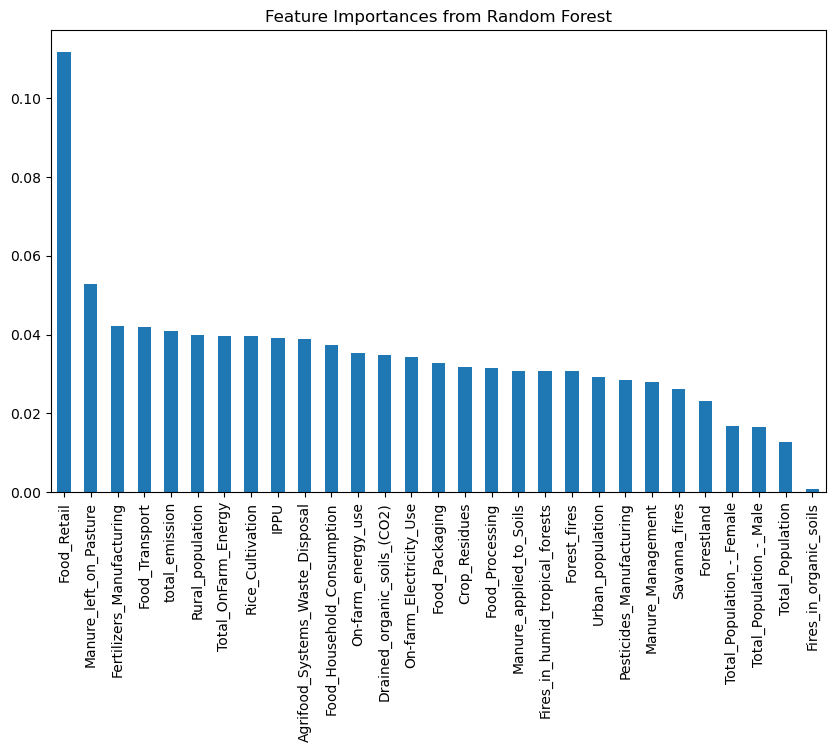

In [71]:
#Random forest feature importances
importance = models['Random Forest'].feature_importances_
feature_importances = pd.Series(importance, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)
#plot feature importance
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.title('Feature Importances from Random Forest')
plt.show()


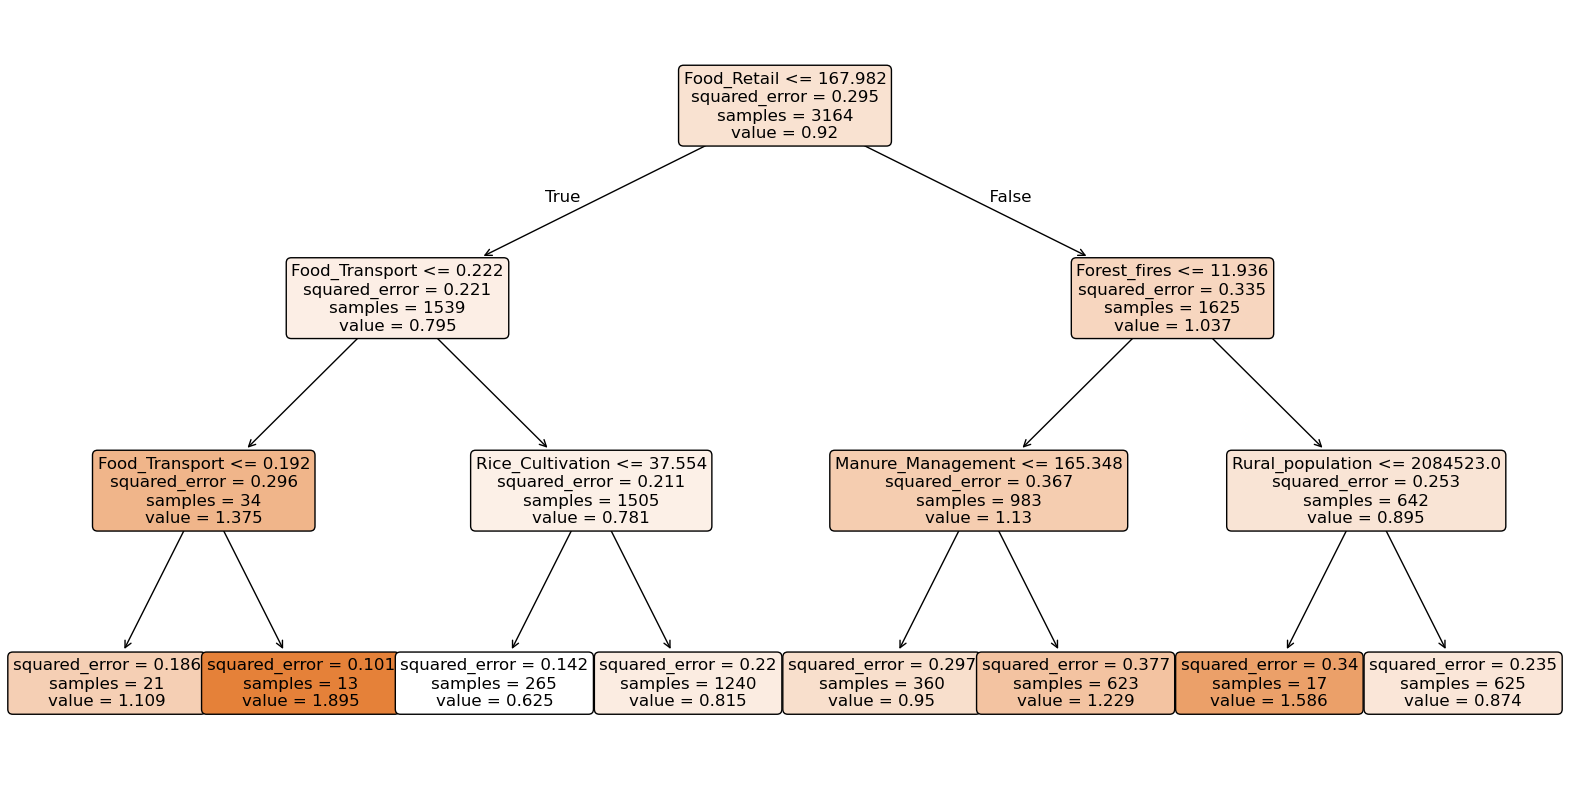

In [69]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(models['Random Forest'].estimators_[0], filled=True, feature_names=X_train.columns, rounded=True, fontsize=12)
plt.show()

Food_Retail                         True
Manure_left_on_Pasture              True
Fertilizers_Manufacturing           True
Food_Transport                      True
total_emission                      True
Rural_population                    True
Total_OnFarm_Energy                 True
Rice_Cultivation                    True
IPPU                                True
Agrifood_Systems_Waste_Disposal     True
Food_Household_Consumption          True
On-farm_energy_use                  True
Drained_organic_soils_(CO2)         True
On-farm_Electricity_Use             True
Food_Packaging                      True
Crop_Residues                       True
Food_Processing                     True
Manure_applied_to_Soils             True
Fires_in_humid_tropical_forests     True
Forest_fires                        True
Urban_population                    True
Pesticides_Manufacturing            True
Manure_Management                   True
Savanna_fires                       True
Forestland      